# 1.

## 1.1
Число скачков ЭФР $\leq n$, и в точке $x$ скачок равен $\frac{k}{n}$, где $k = |\{x_i \in \mathbb X: x_i = x\}|$ .

Тогда по каждой точке разрыва ЭФР $x$ можно определить количество $k$ элементов выборки $x_i: x_i = x$, а значит, и восстановить всю выборку. 

Вариационный ряд есть упорядоченная выборка, поэтому также по ЭФР можно восстановить вариационный ряд, упорядочив восстановленную выборку. 

## 1.2

Если $n$ неизвестно, то мы можем его восстановить с точностью до константного множителя:

Величина скачка пропорциональна доле попавших в точку элементов. 
Предположим, что размер известен и равен $N$, а у ЭФР есть точки разрыва $x_1, x_2, \ldots, x_t$, и величины скачков в них равны $\frac{k_1}{N}, \frac{k_2}{N}, \ldots, \frac{k_t}{N}$ соответственно. Тогда $\sum k = N$. 

Теперь заведём новую выборку, в которую каждый элемент предыдущей возьмём $a$ раз. 

Объём выборки увеличится в $a$ раз, а величина скачков, и, следовательно, вид ЭФР не изменится, т.к. $\frac{a k_i}{aN} = \frac{k_i}{N}$.

То есть, мы можем определить привести все скачки к общему знаменателю и определить $N$ как сумму числителей получившихся дробей. 

Размер выборки $n = aN,\ a \in \mathbb N$.

Также мы можем восстановить вариационный ряд с точностью до кратности $a$ каждого различного объекта из выборки. 

# 2.

$$
P(\{\text{хотя бы 1 скачок}\}) = 
P(\{\text{1 скачок}\}) + 
P(\{\text{2 скачка}\}) + \ldots +
P\left(\left\{\text{$\frac{n}{2}$ скачов}\right\}\right) 
\leq \frac{n}{2} \cdot 
P(\{\text{1 скачок}\})
\\
\text{т.к. } P(\{\text{2 скачка}\}) = P(\{\text{1 скачок} \}) 
\cdot P(\{\text{2-ой скачок| 1 скачок}\}) \leq
P(\{\text{1 скачок} \});
\\
\text{аналогично }P(\{\text{3 скачка} \}) \leq 
P(\{\text{2 скачка}\}) \text{ и так далее.}
$$

Оценим $P (\{ \text{1 скачок} \})$.

Скачок возможен только в точках $x = x_i,\ i = 1, \ldots, n$, где $x_i$ - элементы выборки.


Выберем какой-нибудь элемент выборки - для определённости $x_1$. Чтобы случился скачок в точке $x_1$, нужно чтобы одна из оставшихся $n-1$ реализаций $x_2, \ldots, x_n$ попала ровно в точку $x_1$. Но поскольку выборка из непрервыного распределения, то вероятность каждой реализации попасть в эту точку равна $0$. Значит, вероятность скачка в точке $x_1$ равна 0.

Т.к. выбор $x_1$ ни на что не влияет (т.е. вместо него можно взять любой другой элемент выборки), то вероятность скачка в точке $x_i\ \forall i$ равна 0.

$\implies$ вероятность наличия у ЭФР хотя бы одного скачка величины $\frac{2}{n}$ равна 0. 

# 3 (вариант 4)

100%|██████████| 2000/2000 [00:41<00:00, 48.00it/s]


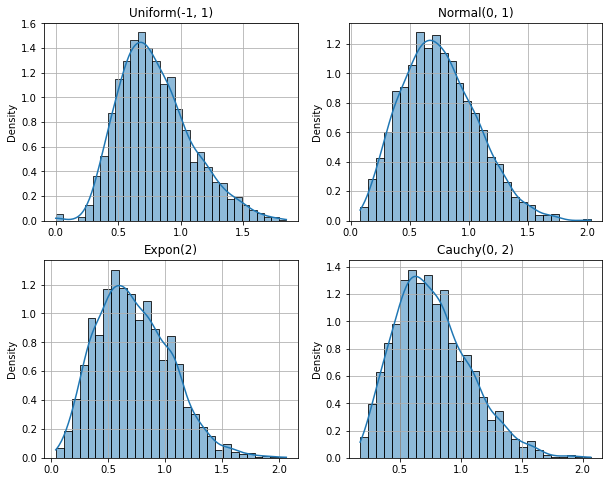

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
from IPython.display import display

from scipy.optimize import minimize
from scipy.stats import uniform, norm, expon, cauchy

distrs = [
    ('Uniform(-1, 1)', uniform(0, 2)),
    ('Normal(0, 1)', norm()),
    ('Expon(2)', expon(scale=1/2)),
    ('Cauchy(0, 2)', cauchy(loc=0, scale=2))
]
N = 100000  # Sample size
T = 2000    # Number of samples

np.random.seed(0)

def ecdf(x):
    return np.searchsorted(X, x) / N

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for index, (name, distr) in enumerate(distrs):
    D = np.zeros(T)
    for i in trange(T):
        X = np.sort(distr.rvs(N))
        res = minimize(lambda x: -abs(distr.cdf(x) - ecdf(x)), 1, method='Powell')
        D[i] = abs(res.fun) * np.sqrt(N)
    ax = axs[index // 2, index % 2]
    ax.grid()
    ax.set_title(name)
    sns.histplot(D, ax=ax, stat='density', kde=True)

Как видно, для каждого из рассмотренных распределений при больших $n$ статистика Колмогорова $D_n$ имеет похожее распределение. Это соответствует с теоретическим утверждением о том, что $D_n$ имеет предельное распределение при $n \to \infty$.

# Дополнительная задача с лекции

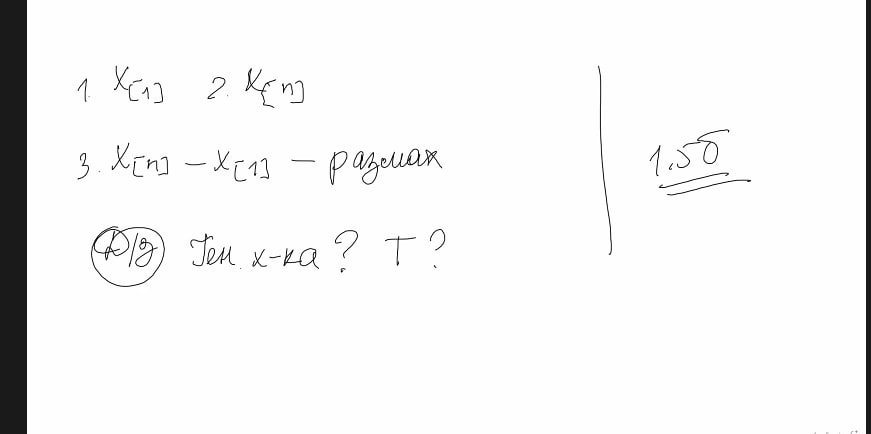

In [125]:
from IPython.display import Image
Image('Задание_с_лекции.jpg', width=500)


В выборке одна из $n$ реализаций попадает в диапазон $(-\infty, X_{[1]}]$. Т.е. выбрать случайный элемент выборки $x$, то $P(x \leq X_{[1]}) = \frac{1}{n}$. 

Пусть $\xi$ есть СВ, характеризующая генеральную совопкупность.

Тогда $P(\xi \in (-\infty, \alpha_{1/n}]) = \frac{1}{n}$, где $\alpha_{1/n}$ - квантиль уровня $\frac{1}{n}$.

Аналогично, вероятность попасть в диапазон $[X_{[2]}, \infty)$, выбрав случайный элемент выборки, равна $\frac{1}{n}$. Найдём границу правосторонней области с такой же мерой для распределения генеральной совокупности.

$$
P(\xi \geq x) = \frac{1}{n} \\
1 - P(\xi < x) = 1 - F_\xi(x) = \frac{1}{n} \\
F_\xi(x) = \frac{n-1}{n} \\
\implies x = \alpha_{(n-1)/n}
$$

Таким образом имеются следующие соответствия:
$$
X_{[1]} \to \alpha_{1/n} \\
X_{[n]} \to \alpha_{(n-1)/n} \\
X_{[n]} - X_{[1]} \to \alpha_{(n-1)/n} - \alpha_{1/n}
$$